<a href="https://colab.research.google.com/github/imbiotech/K-PDA_GMP_W-S/blob/main/k_pda_gmp_w_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#10/06 한국 PDA GMP Workshop 교육 자료 공유

# 서론
---

**지난 10/06 한국 PDA에서 주최한 GMP Workshop에 참석했습니다.**

**"최근 AI를 활용한 의약품 제조 및 품질 관리"와 관련된 Workshop 이었으며, 그 중 이틀차 Python을 활용한 몇 가지 데이터 분석 실습 관련 세션에 참여하였습니다.**

**최근 업계에서는 "머신 러닝을 활용한 빅 데이터 처리 및 분석" 등으로 이야기 하는 분야로서 우리 회사 내에 얼마나 적용 가능성이 있을 지는 지속적으로 검증이 필요한 부분 중 하나이나, 우선 관련 내용을 공유 드리기 위해 아래와 같이 정리하여 드리니 테스트 해보시고 적용 가능 분야를 같이 고민해 주시면 감사하겠습니다.**

**아래 자료는 해당 세션의 강연자인 강원대 김화종 교수님의 자료와 각종 참고 데이터를 편집 및 재가공한 것입니다.**

**오류 지적 및 수정 요청에 대한 코멘트는 언제든지 부탁 드립니다.**

---

# 목차




- 개발 환경 (Development Environment)
  - 콜랩 (Colab)이란?
  - 파이썬 (Python)이란?
    - 라이브러리 (Library)란?
  - 쥬피터 노트북 (Jupyter Notebook)이란?

- 머신 러닝 (Machine Learning, ML)
  - 데이터 (x)
  - ML Model의 종류
  - ML의 목적
  - ML의 성능 평가
  - ML의 최적화기
  - ML의 손실 함수

- 파이썬과 내부 사례 데이터를 활용한 간단한 머신 러닝 프로그램 구현
  - 사례 1. A 제품 수율 예측
    - 데이터 준비 (데이터 전처리, Data Preprocessing)
      - 데이터 클리닝 (Data Cleaning)
      - 이상치 처리 (Outlier handling)
      - 데이터 변환 (Data Transformation)
      - 스케일링 (Data Scaling)
    - 모델 별 분석 및 성능 평가
      - 회귀 모델 (Regression Model)
      - 결정 트리 모델 (Decision Tree Model)
      - 랜덤 포레스트 모델 (Random Forest Model)
      - 부스팅 모델 (Boosting Model)
      - 신경망 모델 (Neural Network Model)
        - 장단기 메모리 (Long Short Term Memory)를 사용한 회귀 모델
  - 사례 2. B 제품 수율 예측 (케이스 작업 진행 중)

# 개발 환경 (Development Environment)

## 콜랩 (Colab)이란?
- Colab은 구글에서 지원하는 파이썬을 개발 및 테스트 하기 위한 가상 기기 (Virtual machine)과 쥬피터 노트북
- https://research.google.com/colaboratory/

## 파이썬 (Python)이란?
- 파이썬은 프로그래밍 언어 중 한 종류로 다른 프로그래밍 언어 대비 사용자 친화적인 체계를 가지고 있음
- https://www.python.org/ (별도 설치 불필요)
- 본 자료에서는 파이썬의 판다스 (pandas), 넘파이 (numpy), 맽플롯립 (matplotlib), 사이킷런 (sklearn), 케라스 (keras) 총 5 개 라이브러리를 사용하여 머신 러닝을 구현할 예정

### 라이브러리 (Library)란?
- 각각의 프로그래밍 언어는 기본적으로 지원하는 함수나 기능이 존재함
  - 단순한 사칙 연산부터 좀 더 복잡한 행렬, 함수, 방정식 등의 계산
  - 입력과 출력 등의 하드웨어 관련 기능
  - 시스템에 대한 접근 등의 소프트웨어 관련 기능

  등

- 하지만 기본적인 기능 외에 추가적으로 필요한 기능은 유저들이 직접 구현해야 함
- 특정 영역에 필요한 여러 기능들을 담아놓은 묶음 (모듈, module)을 라이브러리라고 부름
- 다행히도 이 중 상당수가 오픈 소스로 공개되어 있어 무료로 사용 가능하고 인터넷에서 손쉽게 사용법을 찾아볼 수 있으며, 본 교육 자료에서 사용하기 위한 라이브러리 역시 오픈 소스들임

In [2]:
pip install pandas numpy scikit-learn matplotlib lightgbm keras tensorflow seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 쥬피터 노트북 (Jupyter Notebook)이란?
- 쥬피터 노트북은 웹 사이트를 기반으로 한 개발 환경.
- 개발을 위한 별도의 프로그램 (Integrated Development Environment, IDE) 설치없이 사용 가능
- 단순 코드의 작성 및 실행 뿐만 아니라 텍스트(Markdown), 그래프(Graph), 그림(Image)과 같은 추가 자료를 첨부할 수 있는 시스템

# 머신 러닝 (Machine Learning, ML)

- 수치를 예측 (회귀) / 카테고리를 예측 (분류) / 최적의 추천 등의 작업을 수행하는 소프트웨어
- 데이터를 통한 학습으로 작업 성능을 개선할 수 있음
- 현재 인공 지능(Artificial Intelligence, AI)을 구현하는 가장 대표적인 방법으로 머신 러닝이 사용되고 있음
- 머신 러닝의 기본 동작은 다음과 같은 체계로 이뤄짐
<img src="https://github.com/imbiotech/K-PDA_GMP_W-S/blob/main/Machine%20Learning%20Flow.png?raw=true" align='left'>







## 데이터 (x)
  - 데이터의 종류
    - 훈련 데이터 (Training Set): 모델을 학습하기 위한 데이터
    - 검증 데이터 (Validation Set): 학습 시킨 모델의 정확도를 검증하기 위한 데이터, 반드시 훈련 데이터와는 다른 데이터여야 함
    - 정형 데이터 (Structured Data): 테이블 형태의 데이터
    - 비정형 데이터 (Unstructured Data): 이미지, 텍스트, 영상, 센서 데이터 등 정형화되어 있지 않은 형태의 데이터
  - 머신 러닝은 학습에 사용하는 데이터가 많으면 많을 수록 예측 및 추천 성능이 향상됨
  - 머신 러닝의 성능을 높이기 위해서는 원시 데이터 (Raw Data)로부터 적절한 학습 및 검증 데이터를 만들기 위한 데이터 전처리 (Data Preprocessing) 과정이 필요함



## 머신러닝 모델
- 입력 데이터 (X)로부터 잘 예측된 정답 (label 또는 target, y)를 얻는 소프트웨어
  - 정답을 잘 예측하기 위해서 각 모델을 구성하는 파라미터의 최적치를 찾아야 함
- 모델에는 다음과 같이 다양한 종류가 있음.
  - 선형 모델
  - 로지스틱 회귀
  - SVM
  - 결정 트리
  - 랜덤 포레스트
  - kNN
  - 베이시언
  - 딥러닝 모델 (MLP, CNN, RNN 등)


## 목적
- 머신 러닝의 목적은 다음 중 하나임.
  - 예측 (Prediction)
    - 회귀 예측 (Regression prediction): 수치를 예측
    - 분류 예측 (Classificaion prediction): 대상의 카테고리를 예측
  - 설명 (Description); 확인 필요
  - 군집화 (Clustering); 확인 필요
  - 추천 (Recommendation); 확인 필요

## 성능 평가
- 작성된 머신 러닝 모델이 원하는 작업을 잘 수행하는지 평가하는 값
- 주요 평가 척도
  - 회귀 모델에서의 R-sqared (R^2)
  - 분류 모델에서의 정확도 (Accuracy), 정밀도 (Precision), 리콜 (Recall), f-1 점수, ROC-AUC 등


## 최적화기
- 학습을 통해 모델 파라미터를 최적의 값으로 수렴시키는 알고리즘
- 일반적으로 경사 하강법 (Gradient descent, GD)이 사용됨



## 손실 함수 (Loss function)
- 최적화기를 통해 손실 함수를 최소화하는 방향을 추구
- 손실 함수를 통해 최적화기의 동작이 잘 이뤄지는지를 평가할 수 있음
- 손실 함수의 종류
  - 회귀 모델에서의 평균 제곱 오차 (Mean square error, MSE)
  - 분류 모델에서의 교차 엔트로피 (Cross entropy, CE)

---
---
---

# 파이썬과 내부 사례 데이터를 활용한 간단한 머신 러닝 프로그램 구현

## 사례 1. A 제품 수율 예측
- 대상 제품 및 공정: A 제품의 a 공정 및 b 공정
- 분석 개요: 공정 중 몇 가지 파라미터 p1, p2... 의 변화에 따른 수율 영향성을 평가하고, 수율을 예측

### 데이터 준비
- 본 케이스 스터디에서 다룰 데이터는 2가지 테이블로 다음과 같음
  - 배치 번호, 공정, 기기 번호, 작업 시간의 데이터를 담은 테이블
  - 계측 시간 및 계측 번호에 따른 계측값 데이터를 담은 테이블
- 데이터는 WMS와 BAS를 통해 추출하였으며, 각 데이터 마다 적절한 1 차 sorting을 통해 불필요한 데이터를 정제한 상태임

- 이 데이터를 pandas 라이브러리에서 제공하는 read_csv() 함수를 사용하여 읽어온 후 분석에 사용할 예정
- pandas의 read_csv() 함수는 csv 파일의 데이터를 읽어와 데이터 프레임 (Dataframe, DF)의 형태로 출력함
  - DF는 행과 열로 구성된 2 차원 테이블 구조의 데이터
  - 엑셀과 비슷한 기능을 수행할 수 있음

#### CSV란?
- 쉼표 (,)로 구분된 데이터 값 (Comma-Separated Values)이 담긴 파일 형식
- 단순한 텍스트 형식의 데이터 값으로 웹 페이지, 메모장, 엑셀 등등 어느 프로그램으로도 읽어올 수 있는 장점이 있음
- 꼭 쉼표가 아니더라도 공백 ( )이나 세로 선 (|) 등 특정 기호로 나눠져 있는 모든 데이터 파일을 의미

### 실행 코드

---
아래에 보이는 각각의 코드 블록은 순차적으로 실행하는 방식

위쪽의 코드 블록을 실행하지 않으면 아래쪽을 실행하는 과정에서 오류가 발생할 수 있음

---

In [3]:
# 데이터프레임 기능을 사용하기 위한 pandas 라이브러리를 pd라는 이름으로 호출
import pandas as pd


# ipc_data의 주소 설정 및 ipc_df라는 이름으로 변수 선언
ipc_data_address = "https://raw.githubusercontent.com/imbiotech/K-PDA_GMP_W-S/main/ipc_data.csv"
ipc_df_origin = pd.read_csv(ipc_data_address)


# 데이터 확인
ipc_df_origin[:3]

,batch,Exp,Real,p1,p2,p3,p4,p5,p6
0,21-09-001,366.49,318.01,0.9869,0.9475,0.0314,0.9299,0.0143,0.8136
1,21-09-004,545.41,462.90,0.9869,0.9814,0.0380,0.9659,0.0038,0.8703
2,21-09-005,549.49,507.34,0.9940,0.9805,0.0380,0.9730,0.0045,0.8715


In [4]:
# Real Column과 Exp Column을 사용하여 Real Column 생성 후 기존 데이터 삭제
if "Real" in ipc_df_origin.columns:
    ipc_df_origin["Result"] = round(ipc_df_origin["Real"]/ipc_df_origin["Exp"]*100,2)
    ipc_df_origin.drop(["Exp","Real"],axis=1,inplace=True)

In [5]:
# Training Set과 Validation Set을 분리
ipc_df_trn = ipc_df_origin[:112]
ipc_df_val = ipc_df_origin[112:]

In [6]:
# Training Set 데이터 확인
ipc_df_trn[:3]

,batch,p1,p2,p3,p4,p5,p6,Result
0,21-09-001,0.9869,0.9475,0.0314,0.9299,0.0143,0.8136,86.77
1,21-09-004,0.9869,0.9814,0.0380,0.9659,0.0038,0.8703,84.87
2,21-09-005,0.9940,0.9805,0.0380,0.9730,0.0045,0.8715,92.33


In [7]:
# Validation Set 데이터 확인
ipc_df_val[:3]

,batch,p1,p2,p3,p4,p5,p6,Result
112,23-24-001,1.0,0.9778,0.0390,0.9771,0.0014,0.8705,92.44
113,23-24-002,1.0,0.9818,0.0390,0.9818,0.0013,0.8735,91.50
114,23-24-003,1.0,0.9810,0.0382,0.9810,0.0010,0.8677,92.83


In [8]:
# 특성 컬럼 지정, 해당 컬럼에 있는 값들이 데이터 (X)로 사용됨
features = ipc_df_trn.columns[1:7]


# 데이터 전처리를 진행하기 전에 훈련 데이터 (x)와 훈련 타겟 (y) 사이의 상관 계수를 확인
# 확인 시 오름 차순 정렬하고, 소수점 두 자리까지만 표기
ipc_df_trn[features].corrwith(ipc_df_trn["Result"]).sort_values(ascending=True).round(2)

p5   -0.71
p1    0.09
p3    0.38
p6    0.55
p2    0.60
p4    0.67
dtype: float64

* Correlation의 절대값이 0에 가까울 수록 상관도가 낮은 값
* Correlation의 절대값이 1에 가까울 수록 상관도가 높은 값
    - 1에 가까울 수록 양의 상관 관계
    - -1에 가까울 수록 음의 상관 관계

- 다만 현재 데이터는 별도의 전처리를 거치지 않았기 때문에 상관 수치에 오류가 있을 수 있음
- 전처리를 거친 후 다시 분석

#### 데이터 전처리
- ML 모델 구현을 위해 원시 데이터 (Raw Data)를 그대로 사용할 경우 원하는 모델을 구현할 수 없거나, 구현하더라도 정확도가 떨어질 수 있음
- 이러한 오류를 방지하기 위해 데이터의 정제 과정이 필요하고 이러한 과정을 데이터 전처리라고 부름
- 데이터를 처리하는 방법에는 다음과 같은 것들이 존재함
    - 데이터 클리닝 (Data Cleaning)
    - 이상치 처리 (Outlier)
    - 데이터 변환 (Data Transformation)
    - 스케일링 (Scaling)

##### 데이터 클리닝
- 데이터가 없거나 (결측치, Missing value) 틀린 값 (Error)이 포함되어 있는 데이터를 처리하는 방법
- 다음 세 가지 방법 중에서 선택하여 처리
    - 해당 값이 포함된 샘플을 버린다.
    - 해당 값을 적절한 값으로 대체한다.
    - 해당 값을 그대로 두고 다음 분석 단계에서 처리한다.

##### 이상치 처리
- 이상치 (Outlier)는 데이터의 경향성에서 벗어나있는 데이터를 의미함
- 이상치를 제거하여 데이터 분석의 정확도를 높일 수 있음
- 이상치 탐지 방법
    - 단변수 일 때
        - 표준 편차가 n 이상인 값을 처리한다. (n의 값은 분석하는 사람이 적절히 정한다.)
        - 실제 데이터를 통해 이상치를 파악한다.
    - 다변수 일 때
        - 주성분 분석 (Pricipal Component Analysis, PCA)을 통해 찾는다.

In [9]:
# 각 feature마다 별도의 상자 수염 그림을 그리는 함수, y 축은 자동 조정
def boxplot_features(features,dataframe):
    for feature in features:
        dataframe.boxplot(column=feature,figsize=(5,5))
        plt.title(feature)
        plt.ylabel(feature)
        plt.show()

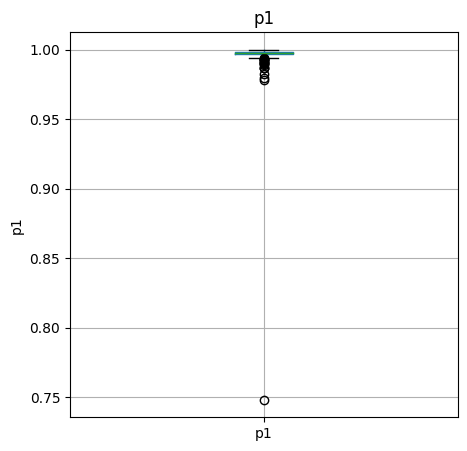

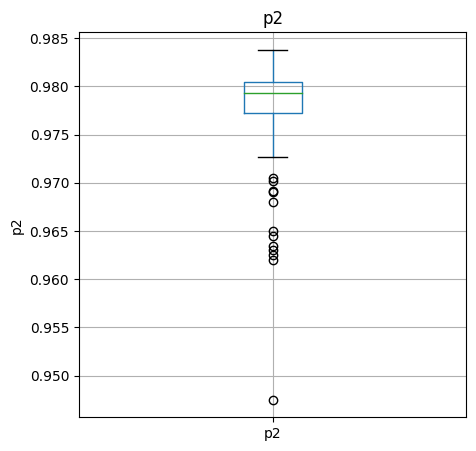

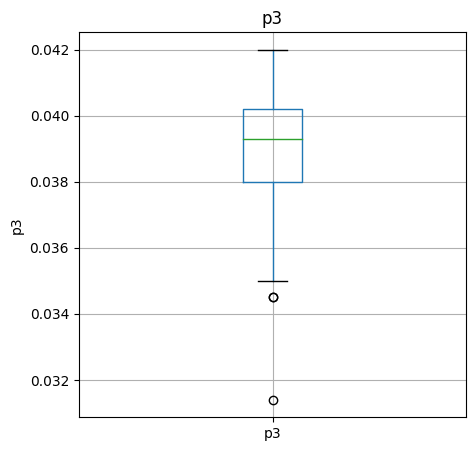

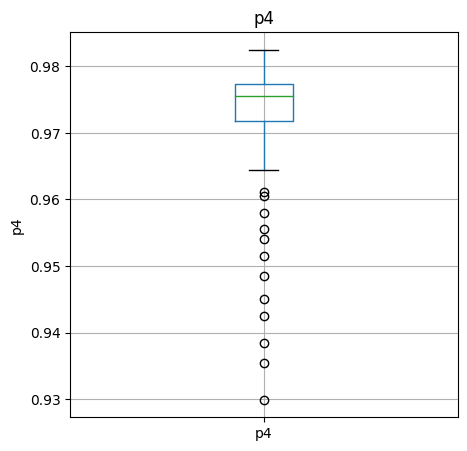

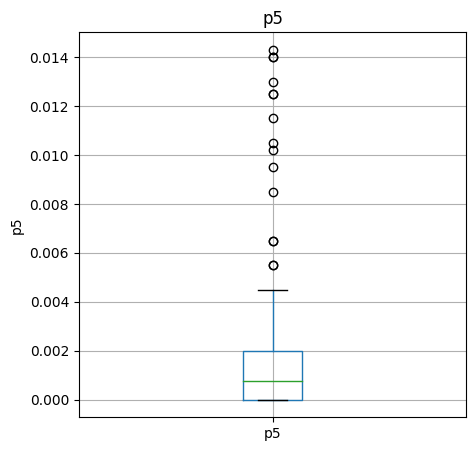

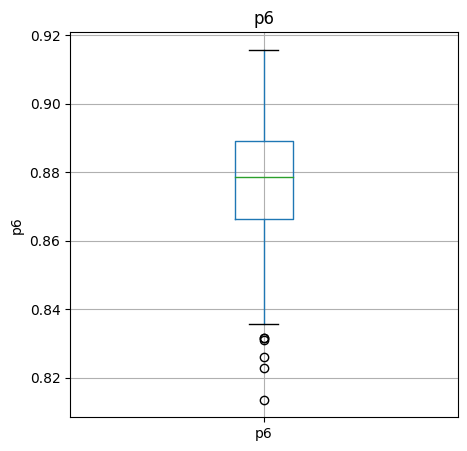

In [10]:
# ipc_df_trn 내부 데이터 중 이상치 (outlier)를 확인
import matplotlib.pyplot as plt
import seaborn as sns

boxplot_features(features,ipc_df_trn)

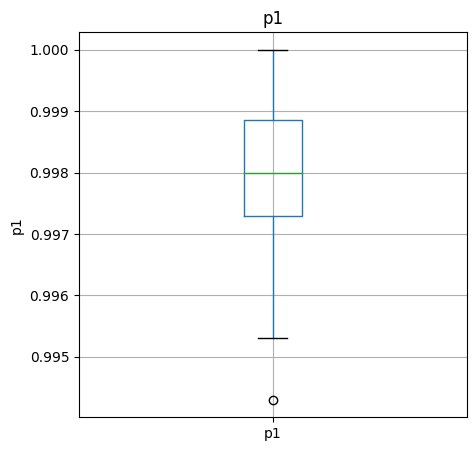

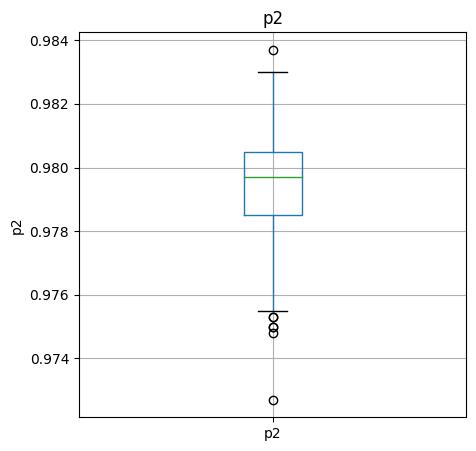

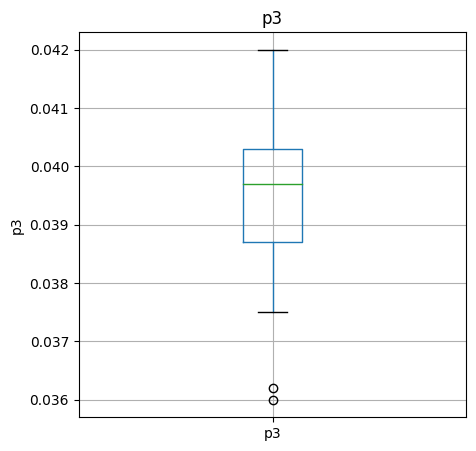

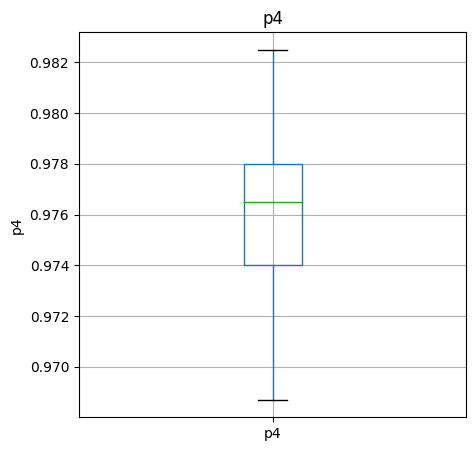

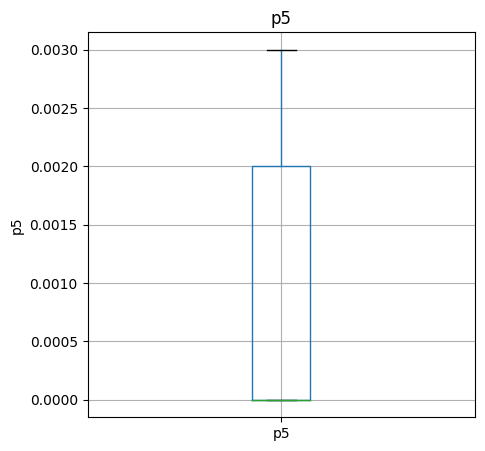

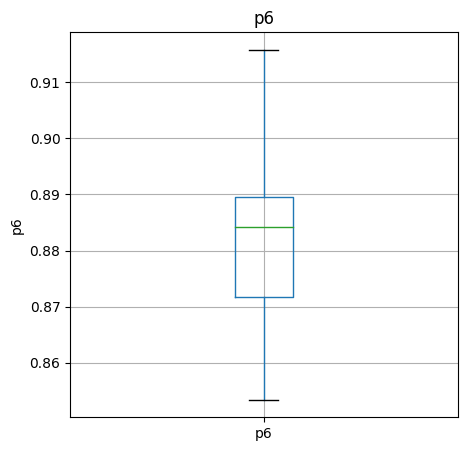

In [11]:
# 이상치 제거
# 1. 1st quartile, 3rd quartile, IQR 계산
Q1 = ipc_df_trn[features].quantile(0.25)
Q3 = ipc_df_trn[features].quantile(0.75)
IQR = Q3 - Q1

# 2. IQR을 이용하여 outlier를 제거할 수 있는 범위 계산
# 2-1. 1st quartile - 1.5 * IQR 보다 큰 값
# 2-2. 3rd quartile + 1.5 * IQR 보다 작은 값
# 2-3. 두 값 사이에 있는 값들은 outlier가 아님
# 2-4. 해당 조건을 만족하지 않는 값들을 제거
ipc_df_trn = ipc_df_trn[~((ipc_df_trn[features] < (Q1 - 1.5 * IQR)) | (ipc_df_trn[features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 이상치 제거 후 데이터 확인
boxplot_features(features,ipc_df_trn)

* 각 상자 수염 그림을 확인했을 때 이상치들이 존재하고 있으며 데이터 클리닝을 위해 해당 이상치 데이터를 버림

In [12]:
# 데이터 전처리를 진행하기 전에 훈련 데이터 (x)와 훈련 타겟 (y) 사이의 상관 계수를 확인
# 확인 시 오름 차순 정렬하고, 소수점 두 자리까지만 표기
ipc_df_trn[features].corrwith(ipc_df_trn["Result"]).sort_values(ascending=True).round(2)

p3   -0.57
p4   -0.13
p1   -0.12
p2   -0.06
p5   -0.01
p6    0.06
dtype: float64

In [ ]:
# 이상치를 제외하기 위한 index 찾기
outlier_index=[]


# p5를 제외하고 각 특성마다 최소값으로 보이는 부분이 이상치로 판단됨. ipc_df_origin 해당 부분을 찾아 삭제
for f in features:
    if f != "p5":
        index = ipc_df_origin.loc[ipc_df_origin[f]==ipc_df_origin[f].min()].index[0] # 각 특성마다 이상치의 행 위치를 찾음
        outlier_index.append(index) # 0 행과 67 행


# 해당하는 행 데이터 삭제
ipc_df_origin.drop(index=list(set(outlier_index)),inplace=True)
ipc_df_origin[:3]

* 첫 행의 데이터가 21-09-001 배치 였다가 지금은 21-09-004 배치로 바뀜

In [ ]:
# 기존 데이터 (ipc_df_origin)가 변경되었으므로 Training Set과 Validation Set을 다시 분리
ipc_df_trn = ipc_df_origin[:110]
ipc_df_val = ipc_df_origin[110:]


# 상관 수치 재분석
ipc_df_trn[features].corrwith(ipc_df_trn["Result"]).sort_values(ascending=True).round(2)

- 이상치 제거 전 데이터의 상관 관계 수치는 아래와 같았으나 p1의 상관 수치가 늘어난 것을 확인할 수 있음
- 현재 존재하는 데이터 중 버릴 데이터가 크게 보이지 않으므로 그대로 진행

▼ 기존 데이터

<img src="https://github.com/imbiotech/K-PDA_GMP_W-S/blob/main/Correlation_Original.png?raw=true" align='left'>

In [ ]:
# plot 상태 변화를 확인하기 위해 ipc_df_trn을 복제
ipc_df_trn_copy = ipc_df_trn.copy()


# Result의 순서대로 나열하여 그래프를 그리기 위해 Result를 index로 설정
if ipc_df_trn_copy.index.name != "Result":
    ipc_df_trn_copy.set_index("Result",inplace=True)
    ipc_df_trn_copy.sort_index(ascending=True,inplace=True)


# 각 데이터 (x) vs 타겟 (y) 에 대한 그래프 작성
for f in features:
    plt.figure(figsize=(10, 3))
    ipc_df_trn_copy[f].plot()
    plt.ylabel(f)
    plt.show()


# 사용이 끝난 변수 삭제
del ipc_df_trn_copy

##### 데이터 변환 (Data Transformation)
- 데이터의 상관 관계를 명확히 하기 위해서 데이터를 특정 형태로 변환하여 분석하는 방법
- 다음과 같은 변환을 사용함
    - 카테고리 인코딩: 하나의 숫자로 표현되어 있지 않은 데이터를 하나의 숫자로 변환하여 분석하는 방법
        - 원 핫 인코딩: 국적, 성별, 계절 등 카테고리를 구분하는 변수를 변환하는 방법
            - 예를 들어 봄은 1, 여름은 2, 가을은 3, 겨울은 4로 변환하여 분석
        - 연령대, 옷 사이즈 등 연속형 변수를 카테고리 인코딩 할 수도 있음
            - 10 대는 1, 20 대는 2, 30 대는 3 등
    - 로그 변환: x 대신 log(x)를 사용
    - 역수 변환: x 대신 1/x를 사용
    - 다차항 변환 (Polynomial trnansformation): x 대신 x^2 이나 x*y를 사용
    - 비율값 사용: x 대신 x/y를 사용
    - 새로운 값 정의: 특정 값 체계를 만들어서 변환
        - BMI = 몸무게 / 키**2

##### 스케일링 (Scaling)
- 여러 변수의 범위가 서로 다른 경우 분석에서 동일한 비중으로 반영하기 위해서는 동일한 범위를 갖도록 변환해야 함
    - Scaling 과정을 거치지 않을 경우에는 데이터 가중치 측면에서 수치가 작은 변수는 과대평가되고 수치가 큰 변수는 과소평가되는 현상이 발생함
- 다양한 스케일링 방식이 존재하며 일반적으로 평균을 0, 표준 편차가 1이 되도록 변환하는 표준 스케일링 (Standard Scaling)을 가장 많이 사용함
- 값의 최소치와 최대치가 정해진 경우는 최소치를 0, 최대치를 1로 변환하는 min-max Scaling도 자주 사용함

- StandardScaler 모듈의 fit_transfer / fit / transfer함수를 사용하면 다음과 같은 작업이 진행됨
    - fit: 각 컬럼의 데이터를 토대로 평균과 분산을 구하고 저장함
    - transfer: 각 컬럼의 평균과 분산 데이터를 통해 데이터를 Standard Scaling 함
 
- Training Set에서 Fit을 통해 평균과 분산을 구하고 해당 값으로 Training Set 및 Validation Set에 대한 Transform을 진행해야 함
    - Fit: Training Set에 대해서만 진행
    - Transform: Training Set에 대한 평균과 분산으로 두 개 Set에 모두 적용

In [ ]:
# Standard Scaling을 적용하기 위해 scikit-learn 라이브러리의 preprocessing 모듈에서 StandardScaler 함수를 호출
from sklearn.preprocessing import StandardScaler
S_Scaler = StandardScaler()


# Scaling 전 Training Set 확인
print("Scaling 진행 전 Training Set")
print(ipc_df_trn[features][:3])


# Scaling 및 Scaling 후 Training Set 확인
ipc_df_trn[features] = S_Scaler.fit_transform(ipc_df_trn[features])
print("\nScaling 진행 후 Training Set")
print(ipc_df_trn[features][:3])


# 줄 간격 조절을 위한 더미
print("\n")

In [ ]:
# Scaling 전 Validation Set 확인
print("Scaling 진행 전  Validation Set")
print(ipc_df_val[features][:3])


# Scaling 및 Scaling 후 Validation Set 확인
ipc_df_val[features] = S_Scaler.transform(ipc_df_val[features])
print("\nScaling 진행 후 Validation Set")
print(ipc_df_val[features][:3])


# 줄 간격 조절을 위한 더미
print("\n")

- 검증 과정에서는 다음과 같은 절차를 진행
    1. Training Set의 p1~p6 (x_train)와 Result (y_train)사이의 관계를 통해 ML Model의 훈련을 진행한다.
    2. 훈련이 끝난 ML Model을 사용하여 Validation Set의 p1~p6 (x_val) 데이터로부터 예측 결과 (y_pred)를 추출한다.
    3. Validation Set의 실제 결과 (y_val)와 예측 결과 (y_pred)를 사용하여 Model의 정확도를 평가한다.

#### 회귀 모델 (Regression Model)

In [ ]:
# 데이터 전처리 완료 및 모델 훈련 시작
# 훈련 데이터 (x_train) 및 훈련 결과 (y_train) 지정
x_train = ipc_df_trn[features]
y_train = ipc_df_trn["Result"]

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
# 검증 데이터 (x_val) 및 검증 결과 (y_val)지정
x_val = ipc_df_val[features]
y_val = ipc_df_val["Result"]


# y_val의 index 초기화, 초기화 하지 않으면 112 번부터 index가 시작됨
y_val.reset_index(drop=True,inplace=True)
y_val

In [ ]:
# 선형 회귀 함수를 호출하고 lin이라는 변수로 지정
from sklearn.linear_model import LinearRegression
lin = LinearRegression()


# 훈련 데이터 및 결과 (x_train, y_train)를 사용하여 선형 회귀 fitting 진행
lin.fit(x_train,y_train)


# fitting 된 모델에 검증 데이터 (x_val)를 대입하여 예측 결과 (y_pred) 도출
y_pred = lin.predict(x_val)
y_pred

##### 회귀 모델의 성능 평가
- 선형 회귀를 포함한 회귀 모델의 성능을 평가하는 지표로 다음과 같은 수치들을 확인함
    - MAE (Mean Absolute Error, 편차 절대값의 평균)
    - MSE (Mean Squared Error, 편차 제곱의 평균) 
    - RMSE (Root Mean Squared Error, 편차 제곱의 평균의 제곱근)
        - 위 3개 지표는 편차 (= 예측 - 실측)을 평가하는 지표
        - 편차의 음수/양수 분포로 인한 상쇄 영향을 줄이기 위해 절대값 (MAE) 또는 제곱 (MSE)을 사용하거나, 다시 제곱으로 인한 과대평가 가능성을 줄이기 위해 제곱근을 적용한 지표 (RMSE)
    - R-Sqaured (R2)
        - 회귀 모델의 성능 평가를 위한 기본적인 지표
        - MSE를 분산으로 정규화한 값을 사용
        - 일반적으로 0~1 사이에 분포하며, 1에 가까울 수록 완벽한 예측
            - 실제 모델에 대해서는 70% 이상만 되어도 꽤 뛰어난 성능의 예측 모듈로 평가함
        - 음수도 나올 수 있음

In [ ]:
# Skit-learn 라이브러리의 Metric 모듈에서 성능 평가를 위한 함수 호출
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as R2
import numpy as np


# 검증 결과 (y_val)와 예측 결과 (y_pred)를 사용한 선형 회귀 모델 평가
def show_regression_result(y_val, y_pred, N=100):
    plt.rc('figure', figsize=(6,4)) # 그래프의 이미지 사이즈를 6 X 4 로 지정
    error = y_pred - y_val # y_pred와 y_val의 차이를 편차 (error)로 지정
    print("MAE=", MAE(y_true=y_val,y_pred=y_pred)) # MAE 계산 및 출력
    print("RMSE=", MSE(y_true=y_val,y_pred=y_pred)**0.5) # RMSE 계산 및 출력
    print("R2=",R2(y_val, y_pred)) # R-Squared 계산 및 출력
    print("max error=", max(abs(error))) # Max Error 계산 및 출력

    if N > 0:
      plt.plot(y_val[:N], 'r.-', label='y_val')
      plt.plot(y_pred[:N], 'b.-', label='y_pred')
      plt.legend()
      plt.show()

In [ ]:
show_regression_result(y_val, y_pred, 1000)

In [ ]:
# 가중치를 Horizontal Bar graph로 확인하는 함수
def plot_features_weights(features, weights):
    W = pd.DataFrame({'Weights':weights}, index=features) # 가중치 데이터를 df 형태로 저장
    W = W.sort_values(by='Weights', ascending=True) # 가중치 데이터를 오름 차순 정렬
    W.plot(kind='barh', figsize=(8, 6)) # 가중치 데이터 시각화

In [ ]:
print(sorted(lin.coef_,reverse=True)) # 가중치 데이터 출력

plot_features_weights(x_train.columns, lin.coef_) # 함수 실행

# 예측 결과값 (y_pred) 삭제
del y_pred

#### 결정 트리 모델 (Decision Tree Model, DTM)

In [ ]:
## 결정 트리를 이용한 이진 분류
# 트리의 깊이를 작게 선택하면 과소적합(under fitting)이 발생한다
# 트리의 깊이를 깊게 선택하면 과대적합(over fitting)이 발생한다
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor as DTR


# 최적 깊이를 찾기 위한 반복적인 fitting 실행
score_list = []
for depth in range(1,100):
    dtr = DTR(max_depth=depth)
    dtr.fit(x_train, y_train)
    print(depth, dtr.score(x_val, y_val).round(4))
    score_list.append(dtr.score(x_val, y_val).round(4))


# 확인된 최적 깊이와 그 때 fitting score 확인
opt_depth = score_list.index(max(score_list))+1
print(f"Optimized Depth: {opt_depth}, Score: {max(score_list)}")

In [ ]:
# 최적의 깊이를 갖는 트리 모델
dtr = DTR(max_depth=opt_depth)
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_val)

In [ ]:
# 트리 모델 성능 평가
show_regression_result(y_val, y_pred, 1000)

- R2 값이 음수가 나올 정도로 예측 성능이 좋지 않음

In [ ]:
# 트리 모델 특성 중요도 보기
# 특성 중요도: 트리를 나눌때 순도를 높이는데(잘 분류하는데) 많이 기여한 정도를 알려준다
plot_features_weights(x_train.columns, dtr.feature_importances_)


# 예측 결과값 (y_pred) 삭제
del y_pred

#### 랜덤 포레스트 모델 (Random Forest Model, RFM)

- Random Forest Model은 Decision Forest Model의 성능을 개선한 앙상블 모델임
    - 앙상블 모델은 여러 개의 Training Data Set을 생성하여 Fitting을 함으로써 좀 더 정확한 예측을 도출하는 모델임
    - 이중 RFM은 이름과 같이 Forest 내에서 Tree를 랜덤하게 추출한 작은 Forest (데이터의 일부만 취한 새로운 Training Set, Weak Data)를 만들어 Fitting을 여러번 진행함

In [ ]:
# RFM 호출
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor as RFR
rfr = RFR()


# Training Set을 통한 RFM fitting 및 예측 결과값 (y_pred) 도출
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_val)


# 데이터 시각화
show_regression_result(y_val=y_val,y_pred=y_pred,N=1000)

In [ ]:
# 랜덤 포레스트 모델의 특성 가중치 보기
plot_features_weights(x_val.columns, rfr.feature_importances_)


# 예측 결과값 (y_pred) 삭제
del y_pred

#### 부스팅 모델 (Boosting Model, BM 또는 Boosting Algorithm, BA)
- Boosting Model은 Decision Forest Model의 성능을 개선한 앙상블 모델임
    - BM은 Forest 내에서 Tree를 순차적으로 추출한 작은 Forest (Weak Data)를 만들어 Fitting을 여러번 진행함

In [ ]:
# Light Gradient BM(LGBM) 모듈 호출
from lightgbm import LGBMClassifier, LGBMRegressor
LGBMr = LGBMRegressor()


# Training Set을 통한 LGBM fitting 및 예측 결과값 (y_pred) 도출
LGBMr.fit(x_train,y_train)
y_pred = LGBMr.predict(x_val)


# 시각화
show_regression_result(y_val=y_val,y_pred=y_pred,N=1000)

#### 신경망 모델 (Neural Network Model, NNM)
- 인간의 두뇌가 시각 및 청각 정보를 처리하는 방식을 모방한 인공지능 모델
- Training Set의 훈련 데이터 (x_train)와 훈련 결과 (y_train) 사이의 비선형 관계를 다룰 수 있음
    - 최초 모델 공개 당시에는 단순한 선형 관계 에측만 가능하였기에 논리적 한계가 존재하는 이유로 사장되었으나, 하드웨어 스펙의 상승과 더불어 비선형 결합을 통한 예측이 가능해지며 다시 연구되고 있는 분야
- 입력층 (입력 시퀀스, Input Sequence)과 출력층 (출력 시퀀스, Output Sequence) 사이에 몇 가지 층위 (은닉층, Hidden layer)를 만들어 각각의 요소 (세포, Cell)을 무작위 가중치를 부여하여 연결한 뒤 예측값을 출력하는 모델

<img src="https://github.com/imbiotech/K-PDA_GMP_W-S/blob/main/NNM.PNG?raw=true">



##### 장단기 메모리 (Long Short Term Memory, LSTM)

* NNM 중 하나인 순환 신경망 모델 (Recurrent Neural Network, RNN)은 아래와 같은 방식으로 input (X_t)에 대한 반복 학습 및 예측 후 output (h_t)가 출력됨
    * 반복 과정을 거쳐 상당히 정교한 예측이 가능함
    * 단, 장기간 의존 (Long-term dependency), 반복하는 과정 중 생성된 최근 n 개의 데이터만을 토대로 학습을 진행하기 때문에 그보다 더 과거에 생성된 중요 데이터들에 대한 학습이 누락된다는 문제점이 존재
        * 단순히 n 을 늘려서 해결하는 경우 학습해야 하는 데이터 사이즈가 불필요하게 커져 예측의 정확도를 떨어뜨리는 문제가 있음
<img src="https://t1.daumcdn.net/cfile/tistory/9901A1415ACB86A021?original">

* 장단기 메모리 (LSTM)은 그러한 한계를 보완하여 설계된 모델
* LSTM은 Samples - time Steps - Features 구조의 입력이 필요함

###### Sequence를 n_step의 크기로 나눠서 샘플을 만듦
- LSTM 모델은 n 번째 Set의 데이터로 n+1 번째 Set의 결과를 예측하므로 해당 마지막 데이터 샘플은 포함하지 않음

<img src="https://github.com/imbiotech/K-PDA_GMP_W-S/blob/main/LSTM.png?raw=true">

- 단, 현재 데이터로 현재를 예측하는 것이 맞는지는 응용에 따라서 점검해야 함

In [ ]:
# numpy 라이브러리를 np라는 이름으로 호출
import numpy as np


# Sequence를 n_steps 사이즈로 나누는 함수
def split_seq(sequence, n_steps):
    x = []
    # Sequence가 30, n이 3일 경우, [0, 1, 2] / [1, 2, 3] / [2, 3, 4] / .... / [28, 29, 30] 으로 분류하여 해당 값을 하나의 2차원 배열 (array)로 반환함
    for i in range(len(sequence) - n_steps):
        x.append(sequence[i:i + n_steps])
    return np.array(x)

In [ ]:
# 위 함수를 사용한 배열 구성의 예시

# 0~30까지 숫자를 통해, 순차적으로 3개의 숫자를 포함한 2차원 배열을 만듦
# 마지막 데이터 샘플인 [28, 29, 30] 은 포함되지 않음
x = np.arange(30).reshape(-1,3)

# 10 * 3 크기의 2 차원 배열
# x =  [  [ 0,  1,  2],  [ 3,  4,  5],  [ 6,  7,  8],  [ 9, 10, 11],  [12, 13, 14],  [15, 16, 17],  [18, 19, 20],  [21, 22, 23],  [24, 25, 26],  [27, 28, 29]  ]


# 해당 2차원 배열을 순차적으로 4개씩 묶어 3차원 배열로 반환, 단 마지막 데이터 제외
inp=split_seq(x,4)

# 6 * 4 * 3 크기의 3 차원 배열
# inp =
# [
#     배열 1: x의 0~4번 배열을 하나로 묶은 배열
#     [ 배열 1-1 [ 0,  1,  2], 배열 1-2 [ 3,  4,  5], 배열 1-3 [ 6,  7,  8], 배열 1-4 [ 9, 10, 11] ],
#     배열 2: x의 1~5번 배열을 하나로 묶은 배열
#     [ 배열 2-1 [ 3,  4,  5], 배열 2-2 [ 6,  7,  8], 배열 2-3 [ 9, 10, 11], 배열 2-4 [12, 13, 14] ],
#     ...
#     배열 6: x의 6~9번 배열을 하나로 묶은 배열
#     [ 배열 6-1 [15, 16, 17], 배열 6-2 [18, 19, 20], 배열 6-3 [21, 22, 23], 배열 6-4 [24, 25, 26] ]
# ]

###### 실제 입력 시퀀스 (Input Sequence) 만들기

In [ ]:
# 훈련 데이터 (ipc_df_trn[features])를 n_steps개 씩 나눠서 input sequence를 생성
n_steps = 20
seq_array = split_seq(ipc_df_trn[features],n_steps)


# 만들어진 3차원 배열의 데이터를 출력
print("Array Shape: ",seq_array.shape) # 90 * 20 * 6 형태의 배열 데이터가 만들어짐
seq_array

# [
#     배열 1: 훈련 데이터의 1~51번째 데이터를 합쳐서 만든 배열
#     [
#         배열 1-1 [-2.520077  ,  0.77039117, -0.60496917, -0.7866208 , 0.52070595, -0.35542961],
#         배열 1-2 [-0.66767217,  0.57187809, -0.60496917,  0.02333417, 0.72791194, -0.2947902 ],
#         ...,
#         배열 1-49 [-0.06759736,  0.351308  ,  0.09124644,  0.17163578, 0.2246974 ,  0.48846879],
#         배열 1-50 [-0.32849945, -0.04571816, -0.60496917, -0.14778308, 0.28389911,  0.80682567]
#     ],
#     배열 2: 훈련 데이터의 2~52번째 데이터를 합쳐서 만든 배열
#     [
#         배열 2-1 [-0.66767217,  0.57187809, -0.60496917,  0.02333417, 0.72791194, -0.2947902 ],
#         ...,
#         배열 2-50 [-0.32849945, -0.04571816, -0.60496917, -0.14778308, 0.28389911,  0.80682567],
#         ...,
#         배열 60-49 [ 0.1150341 ,  0.17485193,  0.72944408,  0.10318889, -0.51532398,  1.81748243],
#         배열 60-50 [-0.01541694,  0.24102295,  1.71574952,  0.02333417, -0.60412654,  1.79221601]
#     ]
# ]

#### 회귀 모델 (Regression Model)

In [ ]:
# 훈련 결과 (ipc_df_trn["Result"])로 output sequence를 생성
label = ["Result"]
label_array = np.concatenate([ipc_df_trn[label][n_steps:]])

print("Array Shape: ",label_array.shape) # 90 * 1 형태의 배열 데이터가 만들어짐
label_array

In [ ]:
# 검증 데이터 (ipc_df_val[features])에 대해서도 동일 작업 수행
seq_array_val = split_seq(ipc_df_val[features],n_steps)


# 만들어진 3차원 배열의 데이터를 출력
print("Array Shape: ",seq_array_val.shape) # 7 * 20 * 6 형태의 배열 데이터가 만들어짐
seq_array_val

In [ ]:
# 검증 결과 (ipc_df_val["Result"])로 output sequence를 생성
label_array_val = np.concatenate([ipc_df_val[label][n_steps:]])

print("Array Shape: ",label_array_val.shape) # 7 * 1 형태의 배열 데이터가 만들어짐
label_array_val

In [ ]:
import keras
from keras import Sequential
from keras.layers import Dropout, LSTM, Dense, Activation

nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()

model.add(
            LSTM(
            input_shape=(n_steps, nb_features), # 스텝 수, 특성 수
            units=100                           # 셀의 수
            )
         )                          

model.add(Dense(1)) # 1
model.add(Activation("linear"))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mse'])

history = model.fit(seq_array, label_array, epochs=1000, batch_size=50, validation_split=0.1, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='min')])

print(history.history.keys())

In [ ]:
y_pred = model.predict(seq_array_val,verbose=1, batch_size=50)

In [ ]:
y_pred

In [ ]:
show_regression_result(label_array_val, y_pred,1000)

---
---
---

## 사례 2. B 제품 수율 예측 (케이스 스터디 진행 중, 추후 공유 예정)
- 대상 제품 및 공정: B 제품의 a 공정 및 b 공정
- 분석 개요: 공정 중 몇 가지 파라미터 p1, p2... 의 변화에 따른 수율 영향성을 평가하고, 수율을 예측

In [ ]:
# 훈련 데이터의 URL 주소 설정
process_time_data_address = "https://raw.githubusercontent.com/imbiotech/K-PDA_GMP_W-S/main/process_time_data.csv"
measure_data_address = "https://raw.githubusercontent.com/imbiotech/K-PDA_GMP_W-S/main/measure_data.csv"


# 파이썬 코드의 #은 한 줄 주석문을 나타내는 것으로 각 코드의 설명을 기록하기 위해 작성함
# 여러 줄을 사용하기 위해 '''''' 방식으로 사용하기도 함

In [ ]:
# pandas 라이브러리를 가져옴
import pandas


# 데이터 URL에 저장된 데이터를 dataframe 형태로 읽어옴
process_df = pandas.read_csv(process_time_data_address)
measure_df = pandas.read_csv(measure_data_address)


- 파이썬에서는 복잡한 과정 없이 한 줄의 코드를 통해 필요한 라이브러리의 기능을 사용할 수 있음

- 이름이 길어서 pandas를 매번 쓰기 귀찮을 경우 뒤 쪽에 "as pd"를 덧붙이면 pandas 대신 pd만 사용하여도 기능을 사용할 수 있음

    - import pandas as pd

---

- pandas.read_csv()는 pandas 라이브러리 내에 있는 read_csv 함수를 호출하여 사용함
    - read_csv 함수는 괄호 안의 주소 (data_address)에 있는 csv형태의 데이터를 읽어옴

- 이 데이터를 CPU에 "df"라는 이름의 변수로 저장하고 이후에는 df만 호출하면 해당 데이터를 불러올 수 있음



In [ ]:
# df에 제대로 된 데이터가 들어왔는지 확인하기 위해 0~2행을 예시 출력
process_df[:3]

In [ ]:
measure_df[:3]

- df의 자료 이름에 [:3]을 붙이면 3행의 앞까지 (0~2행)을 출력함

In [ ]:
# 테이블 정보 확인
process_df.info()


- process_df에는 배치 번호 컬럼을 포함한 총 5개의 컬럼이 존재하고, 각 컬럼에 포함된 데이터는 2100개가 존재함

In [ ]:
measure_df.info()


- measure_df에는 시간 컬럼을 포함한 총 7개의 컬럼이 존재하고, 각 컬럼에 포함된 데이터는 n개가 존재함

- 기본적으로 raw data를 처음 불러 왔을 때 정제 과정을 거친 상태가 아니라면 실제 머신 러닝 모델 구현 시 정확도를 떨어지게 하는 데이터들이 존재할 수 있음

- 이를 실제로 사용하기 위해서는 데이터 전처리 (Data Preprocessing) 과정을 거칠 필요가 있음

In [ ]:
# 문자형 숫자 데이터를 숫자형으로 전환하기 위한 함수
def StringToInt(x: str):
    # 결측값인 <null>을 제외한 나머지 문자형 데이터를 숫자형으로 전환함
    if x != "<null>":
        return float(x)

# 온도 관련 데이터를 Celcius에서 Kelvin으로 전환하기 위한 함수
def CelciusToKelvin(x: float):
    return x+273.15


# 일시 관련 데이터를 양식 통일하기 위한 함수 및 해당 함수를 위해 datetime 라이브러리를 불러옴
from datetime import datetime
def StringToDate(x: str):
    if type(x) == str:
        if "/" in x:
            return datetime.strptime(x, "%m/%d/%Y %H:%M:%S.%f").strftime("%Y-%m-%d %H:%M:%S")
        else:
            return datetime.strptime(x, "%Y-%m-%d %H:%M").strftime("%Y-%m-%d %H:%M:%S")

In [ ]:
# process_df 테이블 업데이트

columns = process_df.columns

for values in columns:
    if "Time" in values:
        process_df[values] = process_df[values].apply(StringToDate)

process_df

In [ ]:
# measure_df 테이블 업데이트

columns = measure_df.columns

for values in columns:
    if "Time" in values:
        measure_df[values] = measure_df[values].apply(StringToDate)
        continue
    measure_df[values] = measure_df[values].apply(StringToInt)
    if "T" in values:
        measure_df[values] = measure_df[values].apply(CelciusToKelvin)

measure_df

In [ ]:
def FindingDateDiff(x: str, y: str, z: int):
    X = datetime.strptime(x,"%Y-%m-%d %H:%M:%S")
    Y = datetime.strptime(process_df[y][z],"%Y-%m-%d %H:%M:%S")
    return (X-Y).days

measure_df2 = measure_df.copy()
measure_df3 = measure_df.copy()


# 시작 시간의 맨 첫 번째 데이터 확인
measure_df2["Time"]=measure_df2["Time"].apply(FindingDateDiff, args=("Start_Time",0))
StartIndex = measure_df2[measure_df2["Time"]>=0].index[0] 


measure_df3["Time"]=measure_df3["Time"].apply(FindingDateDiff, args=("End_Time",0))
EndIndex = measure_df3[measure_df3["Time"]>=0].index[0]

measure_df[StartIndex:EndIndex+1]



